In [58]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [3]:
games_csv = pd.read_csv('games.csv')
staff_csv = pd.read_csv('staff.csv')
game_id = [9,27,33,33,7,5,36,6,1,19]

In [111]:
def generate_dates():
    
    number = np.random.randint(1,125)
    if number%3 == 2:
        period = number * 7
    elif number%3 == 1:
        period = number * 7 + 3
    else:
        period = number * 7 + 6
        
    start = datetime.strptime('2021-04-07', "%Y-%m-%d")
    tournament_date = start + timedelta(days=period)

    return(tournament_date)
    

In [131]:
def generate_total_players(table_game,game_id):
    inventory_table = pd.read_csv('inventory_rent.csv')
    
    games_number = inventory_table.game_id.value_counts()
    availability_df = pd.DataFrame(games_number)#, columns=['game_id','piece'])
    
    games_table = table_game[['game_id','min_players','max_players','duration', 'max_players_in_team','min_players_in_team']]
    game_id_df = pd.DataFrame(game_id, columns=['game_id'])
    merged = game_id_df.merge(games_table, on='game_id', how='inner')
    merged_availability = merged.merge(availability_df, on='game_id', how='inner')

    total_num = []
    for i in range(len(merged_availability)):
        row = merged_availability.iloc[i]
        
        if row['count'] > 20:
            boards_num = 16
        elif row['count'] > 10 and row['count'] <= 20: 
            boards_num = int(np.ceil(row['count'] / 2))
        else:
            boards_num = row['count'] - 1
        
        if row.max_players_in_team > 1: 
            teams_per_board =  int(np.floor(row['max_players'] / row['max_players_in_team']))
            players_all_board = [teams_per_board for i in range(boards_num)]
            total_num.extend([np.sum(players_all_board)])

        else:
            players_per_board = [np.random.randint(row.min_players,row.max_players + 1) for i in range(boards_num)]
            total_num.extend([np.sum(players_per_board)])
            
    merged_availability['total_players_number'] = total_num
    
    return(merged_availability)

In [132]:
generate_total_players(games_csv, game_id)

,game_id,min_players,max_players,duration,max_players_in_team,min_players_in_team,count,total_players_number
0,9,3,6,60,1,1,4,12
1,27,1,2,180,1,1,16,12
2,33,2,4,20,1,1,11,20
3,33,2,4,20,1,1,11,15
4,7,2,4,30,1,1,21,53
5,5,1,4,60,1,1,12,13
6,36,2,2,120,1,1,15,16
7,6,2,4,20,2,1,10,18
8,1,2,4,45,1,1,23,47
9,19,1,2,120,1,1,19,15


In [16]:
def find_total_players():

IndentationError: expected an indented block (4106219313.py, line 1)

In [37]:
def generate_tournaments():
    
    games_csv = pd.read_csv('games.csv')
    staff_csv = pd.read_csv('staff.csv')

    name = ['Cosmic Entertainment', 'Battlefields of Bonaparte', 'The Kobolds', 'Gaming Evening', 'Hamst&Furious', 'Indian Camp', 'Vietgame',
             'Thematic Contest', 'Spring Tournament', 'Star Trek Day']
    n = len(name)
    tournament_id = np.arange(1,n+1)
    game_id = [9,27,33,33,7,5,36,6,1,19]
    date = np.sort([generate_dates() for _ in range(n)])
    
    team_players_number = generate_total_players(games_csv, game_id)
    
    max_staff = staff_csv.staff_id.max()
    staff_id = [np.random.randint(1,max_staff+1) for _ in range(n)]
    
    
    tournaments_dict = {'tournament_id' : tournament_id,
                    'name' : name,
                    'date' : date,
                    'game_id' : game_id,
                    'team_players_number' : team_players_number,
                    'staff_id' : staff_id,
}
    tournaments_df = pd.DataFrame(tournaments_dict)
    
    return(tournaments_df)

In [38]:
generate_tournaments()

,tournament_id,name,date,game_id,team_players_number,staff_id
0,1,Cosmic Entertainment,2021-01-18,9,1,3
1,2,Battlefields of Bonaparte,2021-03-01,27,1,5
2,3,The Kobolds,2021-04-08,33,1,5
3,4,Gaming Evening,2021-04-29,33,1,1
4,5,Hamst&Furious,2021-12-12,7,1,1
5,6,Indian Camp,2022-09-15,5,1,4
6,7,Vietgame,2022-12-29,36,1,4
7,8,Thematic Contest,2023-02-05,6,2,3
8,9,Spring Tournament,2023-02-09,1,1,3
9,10,Star Trek Day,2023-03-27,19,1,4


In [36]:
games_csv = pd.read_csv('games.csv')
games_csv = pd.DataFrame(games_csv)

staff_csv = pd.read_csv('staff.csv')
staff_scv = pd.DataFrame(staff_csv)

In [41]:
tournaments.iloc[0] = [1, 'Cosmic Entertainment', datetime.date(2021,1,22), 1, 9, 1, 12]
tournaments.iloc[1] = [2, 'Battlefields of Bonaparte', datetime.date(2021,6,16), 1, 27, 3, 30]
tournaments.iloc[2] = [3, 'The Kobolds', datetime.date(2021,9,8), 2, 33, 4, 32]
tournaments.iloc[3] = [4, 'Gaming Evening', datetime.date(2021,12,20), 1, 33, 2, 32]
tournaments.iloc[4] = [5, 'Hamst&Furious', datetime.date(2022,1,4), 1, 7,2,37]
tournaments.iloc[5] = [6, 'Indian Camp', datetime.date(2022,7,28), 1, 5,3,40]
tournaments.iloc[6] = [7, 'Vietgame', datetime.date(2022,10,2), 1, 36,1,16] ## niedziela
tournaments.iloc[7] = [8, 'Thematic Contest', datetime.date(2023,1,19), 2, 6,4,36]
tournaments.iloc[8] = [9, 'Spring Tournament', datetime.date(2023,3,25), 1, 1,1,30]
tournaments.iloc[9] = [10, 'Star Trek Day', datetime.date(2023,6,7), 1, 19,2,8]
tournaments

,tournament_id,name,date,team_players_number,game_id,staff_id,total_players_number
0,1,Cosmic Entertainment,2021-01-22,1,9,1,12
1,2,Battlefields of Bonaparte,2021-06-16,1,27,3,30
2,3,The Kobolds,2021-09-08,2,33,4,32
3,4,Gaming Evening,2021-12-20,1,33,2,32
4,5,Hamst&Furious,2022-01-04,1,7,2,37
5,6,Indian Camp,2022-07-28,1,5,3,40
6,7,Vietgame,2022-10-02,1,36,1,16
7,8,Thematic Contest,2023-01-19,2,6,4,36
8,9,Spring Tournament,2023-03-25,1,1,1,30
9,10,Star Trek Day,2023-06-07,1,19,2,8


In [8]:
inventory_table = pd.read_csv('inventory_rent.csv')

In [12]:
def games_for_tournament(id_value):
    """
    Function that returns a number of pieces that can be used in tournament. 
    Always left one piece for rental.
    param value: id of the game
    """
    return((inventory_table.game_id == id_value).sum() - 1) 

In [35]:
games_for_tournament(9)

3

In [41]:
inventory_table.game_id.value_counts()

game_id
13    69
22    45
32    32
39    24
1     23
4     22
7     21
10    20
29    20
19    19
35    17
27    16
36    15
5     12
33    11
44    10
6     10
24     9
42     8
37     8
38     7
40     7
25     6
3      6
21     5
2      5
11     5
26     5
46     5
34     4
9      4
28     4
47     3
31     3
30     3
17     3
50     2
41     2
45     1
18     1
43     1
48     1
23     1
14     1
16     1
15     1
8      1
20     1
Name: count, dtype: int64

In [43]:
tournaments.to_csv('tournaments.csv', index = False)

In [62]:
sample = [np.random.randint(1,10+1) for i in range(100)]

(array([ 7., 10., 10., 10., 14.,  9., 12.,  7., 21.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 9 artists>)

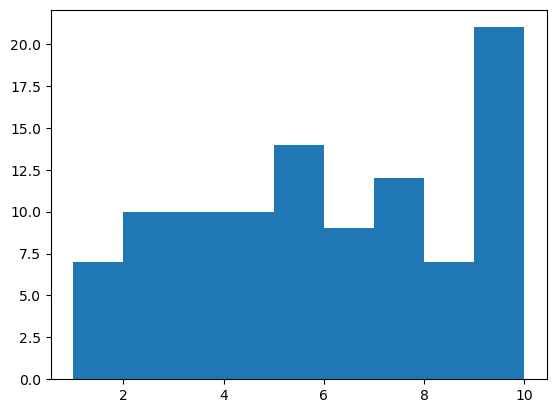

In [63]:
plt.hist(sample, bins = 9)